In [159]:
import geopandas as gpd
import matplotlib.pyplot as plte 
from cartopy.feature import ShapelyFeature
import cartopy.crs as ccrs
import matplotlib.patches as mpatches
import fiona as f
import numpy as np
import matplotlib.lines as mlines
import matplotlib.font_manager as fm
from shapely.geometry import Point
from geopandas import GeoDataFrame

In [160]:
plt.ion()

In [176]:
seadef = gpd.read_file('Data/seadef_sel.shp')
dtm = gpd.read_file('Data/Raster_tr35_dt3.shp')
points1 = gpd.read_file('Data/points1.shp')
settlement = gpd.read_file('Data/settlement_xy.csv')
seadefpoints = gpd.read_file('Data/seadef_points.csv')

C:\Users\wells\anaconda3\envs\egm722\lib\site-packages\geopandas\geodataframe.py:577: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


In [82]:
points1.crs

<Projected CRS: EPSG:27700>
Name: OSGB 1936 / British National Grid
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: United Kingdom (UK) - offshore to boundary of UKCS within 49°45'N to 61°N and 9°W to 2°E; onshore Great Britain (England, Wales and Scotland). Isle of Man onshore.
- bounds: (-9.0, 49.75, 2.01, 61.01)
Coordinate Operation:
- name: British National Grid
- method: Transverse Mercator
Datum: OSGB 1936
- Ellipsoid: Airy 1830
- Prime Meridian: Greenwich

In [178]:
points1

,Field1,lat,lon,NAME,geometry
0,0,51.256446,1.347814,WORTH,POINT (633690.129 156132.859)
1,1,51.236464,1.355176,HACKLINGE,POINT (634305.238 153934.895)
2,2,51.267010,1.384600,SANDWICH BAY,POINT (636202.141 157424.968)
3,3,51.270460,1.361067,SANDOWN,POINT (634543.277 157733.047)
4,4,51.275113,1.345068,SANDWICH,POINT (633403.947 158199.345)
5,5,51.250717,1.391082,GREENACRES,POINT (636737.901 155634.515)
6,6,51.223681,1.382699,SHOLDEN,POINT (636291.477 152601.898)


In [83]:
seadef.crs

<Projected CRS: EPSG:27700>
Name: OSGB 1936 / British National Grid
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: United Kingdom (UK) - offshore to boundary of UKCS within 49°45'N to 61°N and 9°W to 2°E; onshore Great Britain (England, Wales and Scotland). Isle of Man onshore.
- bounds: (-9.0, 49.75, 2.01, 61.01)
Coordinate Operation:
- name: British National Grid
- method: Transverse Mercator
Datum: OSGB 1936
- Ellipsoid: Airy 1830
- Prime Meridian: Greenwich

In [84]:
dtm.crs

<Projected CRS: EPSG:27700>
Name: OSGB 1936 / British National Grid
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: United Kingdom (UK) - offshore to boundary of UKCS within 49°45'N to 61°N and 9°W to 2°E; onshore Great Britain (England, Wales and Scotland). Isle of Man onshore.
- bounds: (-9.0, 49.75, 2.01, 61.01)
Coordinate Operation:
- name: British National Grid
- method: Transverse Mercator
Datum: OSGB 1936
- Ellipsoid: Airy 1830
- Prime Meridian: Greenwich

<ipython-input-22-dbeef5bfd3af>:47: UserWarning: The default value for the *approx* keyword argument to TransverseMercator will change from True to False after 0.18.
  tmc = ccrs.TransverseMercator(sbllx, sblly)


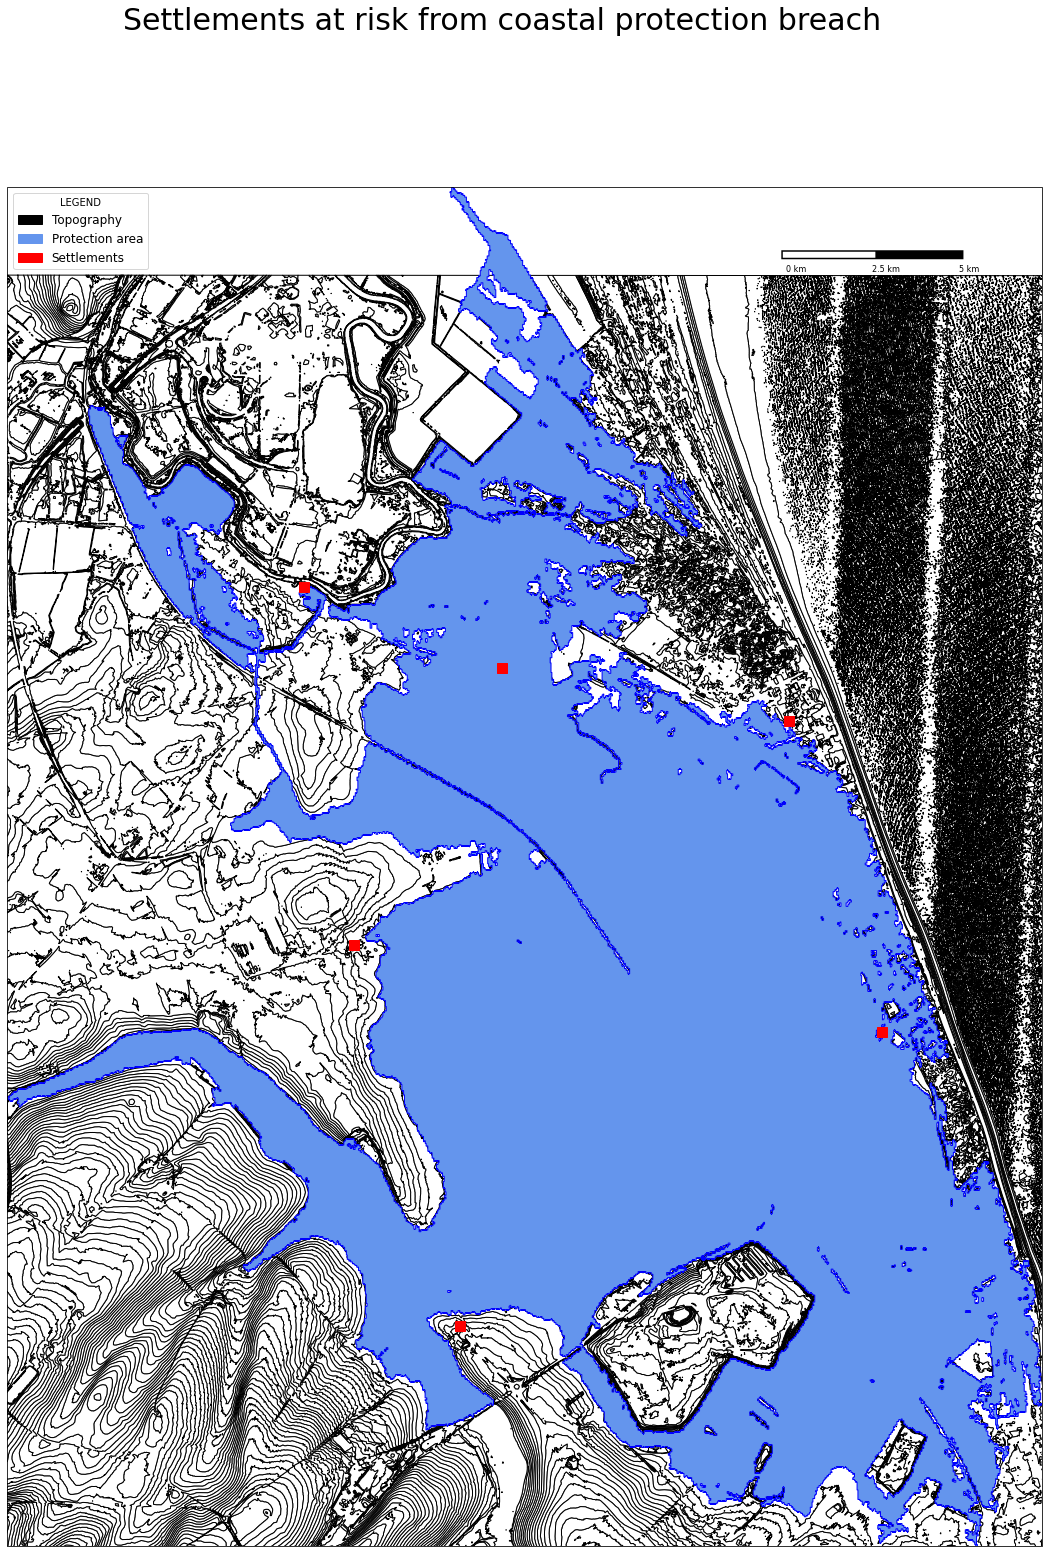

In [22]:
myFig = plt.figure(figsize=(25, 25))

myCRS = ccrs.UTM(31)

ax = plt.axes(projection=ccrs.Mercator())




top_feature = ShapelyFeature(dtm['geometry'], myCRS, edgecolor='black', facecolor='w')
xmin, ymin, xmax, ymax = dtm.total_bounds
ax.add_feature(top_feature)

ax.set_extent([xmin, xmax, ymin, ymax], crs=myCRS)


inset_feature = ShapelyFeature(seadef['geometry'], myCRS, edgecolor='blue', facecolor='CornflowerBlue')
xmin, ymin, xmax, ymax = seadef.total_bounds
ax.add_feature(inset_feature)
alpha = 1

end_feature = ax.plot(points1.geometry.x, points1.geometry.y, 's', color='red', ms=10, transform=myCRS)


plt.suptitle('Settlements at risk from coastal protection breach', fontsize=30)

top_feature = mpatches.Patch(color='black', label='Topography')
inset_feature = mpatches.Patch(color='CornflowerBlue', label='Protection area')
end_feature = mpatches.Patch(color='red', label='Settlements')


plt.legend(handles=[top_feature, inset_feature, end_feature], fontsize=12, title="LEGEND")

gridlines = ax.gridlines(draw_labels=True,
                         xlocs=[1.34, 1.35, 1.36, 1.37, 1.38, 1.39],
                         ylocs=[51.21, 51.22, 51.23, 51.24, 51.25, 51.26])

gridlines.left_labels = False
gridlines.bottom_labels = False
ax.set_extent([xmin, xmax, ymin, ymax], crs=myCRS)

def scale_bar(ax, location=(0.92, 0.95)):
    llx0, llx1, lly0, lly1 = ax.get_extent(ccrs.PlateCarree())
    sbllx = (llx1 + llx0) / 2
    sblly = lly0 + (lly1 - lly0) * location[1]

    tmc = ccrs.TransverseMercator(sbllx, sblly)
    x0, x1, y0, y1 = ax.get_extent(tmc)
    sbx = x0 + (x1 - x0) * location[0]
    sby = y0 + (y1 - y0) * location[1]

    plt.plot([sbx, sbx - 1000], [sby, sby], color='k', linewidth=9, transform=tmc)
    plt.plot([sbx, sbx - 500], [sby, sby], color='k', linewidth=6, transform=tmc)
    plt.plot([sbx-500, sbx - 1000], [sby, sby], color='w', linewidth=6, transform=tmc)

    plt.text(sbx, sby-100, '5 km', transform=tmc, fontsize=8)
    plt.text(sbx-500, sby-100, '2.5 km', transform=tmc, fontsize=8)
    plt.text(sbx-1000, sby-100, '0 km', transform=tmc, fontsize=8)

scale_bar(ax)


plt.show()


In [179]:
settlement

,field_1,lat,lon,loc,geometry
0,0,51.2564460,1.3478140,WORTH,None
1,1,51.2364640,1.3551760,HACKLINGE,None
2,2,51.2670103,1.3846005,SANDWICH BAY,None
3,3,51.2704600,1.3610670,SANDOWN,None
4,4,51.2751129,1.3450678,SANDWICH,None
5,5,51.2507172,1.3910824,GREENACRES,None
6,6,51.2236810,1.3826990,SHOLDEN,None


In [180]:
seadefpoints

,field_1,lat,lon,loc,geometry
0,0,51.2561844,1.3505890,WORTH,None
1,1,51.2364729,1.3572013,HACKLINGE,None
2,2,51.2661709,1.3863067,SANDWICH BAY,None
3,3,51.2704600,1.3610670,SANDOWN,None
4,4,51.2751129,1.3450678,SANDWICH,None
5,5,51.2507172,1.3910824,GREENACRES,None
6,6,51.2251959,1.3846437,SHOLDEN,None


In [181]:
pnt1 = Point(51.2704600, 1.3610670)
pnt2 = Point(51.2704600, 1.3610670)
points_df = gpd.GeoDataFrame({'geometry': [pnt1, pnt2]}, crs='EPSG:4326')
points_df = points_df.to_crs('EPSG:27700')
points_df2 = points_df.shift() #We shift the dataframe by 1 to align pnt1 with pnt2
points_df.distance(points_df2)

0    NaN
1    0.0
dtype: float64